## Model the NPR articles with Latent Dirichlet Allocation

  1. Run the LDA model with sklearn (http://scikit-learn.org/stable/modules/decomposition.html#latentdirichletallocation)
  2. Visualize it with pyldavis (https://pyldavis.readthedocs.io/en/latest)

In [1]:
# USE Python3
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/IPython/.*')

import pyLDAvis
import pyLDAvis.sklearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

pyLDAvis.enable_notebook()

df = pd.read_csv('npr_articles.csv', parse_dates=['date_published'])
text = df['processed_text'].values.tolist()

## Vectorize the words

Essentially create a numeric representation of the words based on frequencies

In [2]:
print(ENGLISH_STOP_WORDS)
#print(text)
text2 = set(ENGLISH_STOP_WORDS)
text2.add('say')
text2.add('people')
text2.add('make')
text3 = frozenset(text2)
#text2.append('say')

frozenset(['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'fifty', 'four', 'not', 'own', 'through', 'yourselves', 'go', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'whom', 'seeming', 'under', 'ours', 'has', 'might', 'thereafter', 'latterly', 'do', 'them', 'his', 'around', 'than', 'get', 'very', 'de', 'none', 'cannot', 'every', 'whether', 'they', 'front', 'during', 'thus', 'now', 'him', 'nor', 'name', 'several', 'hereafter', 'always', 'who', 'cry', 'whither', 'this', 'someone', 'either', 'each', 'become', 'thereupon', 'sometime', 'side', 'two', 'therein', 'twelve', 'because', 'often', 'ten', 'our', 'eg', 'some', 'back', 'up', 'namely', 'towards', 'are', 'further', 'beyond', 'ourselves', 'yet', 'out', 'even', 'will', 'what', 'still', 'for', 'bottom', 'mine', 'since', 'please', 'forty', 'per', 'its', 'everything', 'behind', 'un', 'above', 'between', 'it', 'nei

In [10]:
max_features = 1000
tf_vectorizer = CountVectorizer(max_df=0.90,
                                min_df=2,
                                max_features=max_features,
#                                stop_words='english')
                                stop_words=text3)
#print(dir(tf_vectorizer))
#print((tf_vectorizer.stop_words))
tf = tf_vectorizer.fit_transform(text)
print("ready")

ready


## Run LDA

In [16]:
n_topics = 20
lda_model = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                      learning_method='online',
                                      learning_offset=50.,
                                      random_state=0)

lda_model.fit(tf)
pyLDAvis.sklearn.prepare(lda_model,tf, tf_vectorizer, R=20)

/home/ubuntu/src/z/.ve/local/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
11     23.066151        1       1 -0.091928  0.092359
14     10.561475        1       2  0.093248 -0.060776
17     10.181969        1       3 -0.034802  0.030549
15      8.854059        1       4  0.000032 -0.036949
5       6.147327        1       5  0.051329 -0.094822
2       5.917162        1       6 -0.146842  0.142892
13      4.622486        1       7 -0.073630  0.107264
19      3.983407        1       8 -0.015820 -0.106185
7       3.922940        1       9  0.050470  0.154105
3       3.786648        1      10  0.154933  0.051122
4       3.482174        1      11 -0.103100 -0.034711
12      3.075084        1      12  0.164971  0.017081
16      2.717452        1      13  0.092063 -0.058381
8       2.409808        1      14  0.171623 -0.003669
9       2.302209        1      15  0.091451  0.086150
6       2.195968        1      16  0.025778 -0.201378
1       1.471117        1      17 -0.220219 -0.227667
10      0.655572        1      18 -0.062014 -0.042271
0       0.609306        1      19 -0.157038  0.156156
18      0.037686        1      20  0.009493  0.029130, topic_info=     Category         Freq             Term        Total  loglift  logprob
term                                                                      
937   Default  2490.000000            trump  2490.000000  20.0000  20.0000
467   Default   932.000000              job   932.000000  19.0000  19.0000
668   Default  2165.000000        president  2165.000000  18.0000  18.0000
405   Default   906.000000           health   906.000000  17.0000  17.0000
740   Default  1775.000000           report  1775.000000  16.0000  16.0000
168   Default   908.000000          company   908.000000  15.0000  15.0000
572   Default   803.000000            music   803.000000  14.0000  14.0000
864   Default  1183.000000            story  1183.000000  13.0000  13.0000
427   Default   423.000000            human   423.000000  12.0000  12.0000
357   Default   599.000000             food   599.000000  11.0000  11.0000
990   Default  1969.000000             work  1969.000000  10.0000  10.0000
964   Default   594.000000             vote   594.000000   9.0000   9.0000
375   Default   333.000000             game   333.000000   8.0000   8.0000
907   Default  1916.000000            think  1916.000000   7.0000   7.0000
489   Default   861.000000              law   861.000000   6.0000   6.0000
147   Default   781.000000             city   781.000000   5.0000   5.0000
782   Default   881.000000           school   881.000000   4.0000   4.0000
838   Default   603.000000             song   603.000000   3.0000   3.0000
283   Default   748.000000         election   748.000000   2.0000   2.0000
117   Default   630.000000             care   630.000000   1.0000   1.0000
949    Topic1   118.767661         universe   122.644321   1.4347  -6.3526
643    Topic1    94.134912           planet   102.299414   1.3836  -6.5850
590    Topic1   104.576662            novel   116.078631   1.3625  -6.4798
434    Topic1   111.427860          imagine   131.186136   1.3036  -6.4164
272    Topic1   116.456695            earth   138.438541   1.2939  -6.3722
337    Topic1   110.818994          feeling   135.233190   1.2677  -6.4219
561    Topic1   106.335844              mom   131.518809   1.2543  -6.4632
844    Topic1   191.613069            space   237.393024   1.2526  -5.8743
545    Topic1    95.296087           memory   120.940757   1.2285  -6.5728
216    Topic1    83.096989              dad   105.578295   1.2274  -6.7098
...       ...          ...              ...          ...      ...      ...
674   Topic20     0.112497         previous   106.272720   1.0328  -6.8978
293   Topic20     0.112595           ensure   106.576220   1.0308  -6.8969
927   Topic20     0.143905      traditional   136.823770   1.0263  -6.6515
3     Topic20     0.107169         abortion   101.970677   1.0256  -6

In [17]:
def get_top_words(model, feature_names, n_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        _top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        top_words[str(topic_idx)] = _top_words
    return(top_words)

In [18]:
## get the token to topic matrix
word_topic = np.zeros((max_features,n_topics),)
print(n_topics)
lda_model.components_
for topic_idx, topic in enumerate(lda_model.components_):
    word_topic[:,topic_idx] = topic

print("token-topic matrix",word_topic.shape)

## create a matrix of the top words used to define each topic
top_words = 15
tf_feature_names = np.array(tf_vectorizer.get_feature_names())
top_words = get_top_words(lda_model,tf_feature_names,top_words)
all_top_words = np.array(list(set().union(*[v for v in top_words.values()])))

for key,vals in top_words.items():
    print(key," ".join(vals))
print("total words: %s"%len(all_top_words))

top_word_inds = [np.where(tf_feature_names == tw)[0][0] for tw in all_top_words]

20
('token-topic matrix', (1000, 20))
('11', u'just know time think come work way life want thing feel really look write new')
('10', u'game product box milk company data player claim consumer base sell theory use fan play')
('13', u'story news medium radio new relationship want word tree think fake love question listen listener')
('12', u'city force war syria government refugee rebel turkey report aleppo isis syrian group military attack')
('15', u'president obama think country time know way thing trump work administration new need right talk')
('14', u'trump president elect russia campaign donald_trump election china intelligence russian obama business report state government')
('17', u'school child student study use parent woman high help family work research time education teacher')
('16', u'vote election party israel power coal country settlement voter president candidate political win leader government')
('19', u'health care patient doctor medical hospital plan drug program cance

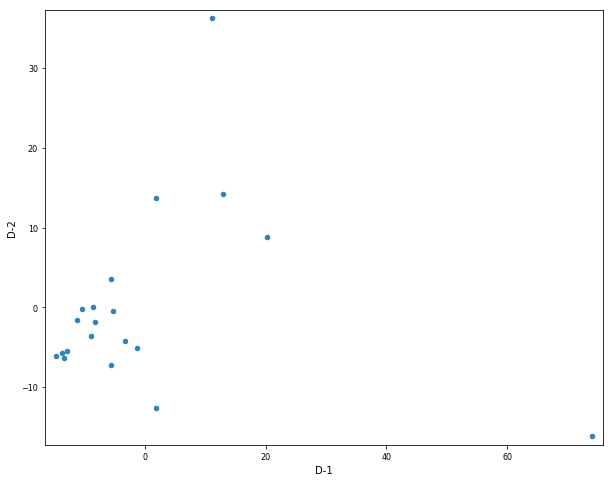

In [19]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
import matplotlib.pyplot as plt

def make_scatter(fit,ax,pcX=0,pcY=1,font_size=10,font_name='sans serif',ms=20,leg=True,title=None):
    colors = ['k','cyan','r','orange','g','b','magenta']
    lines = []
    indices = np.arange(fit.shape[0])
    s = ax.scatter(fit[indices,pcX],fit[indices,pcY],s=ms,alpha=0.9)
    lines.append(s)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(font_size-2)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(font_size-2)

    buff = 0.02
    bufferX = buff * (fit[:,pcX].max() - fit[:,pcX].min())
    bufferY = buff * (fit[:,pcY].max() - fit[:,pcY].min())
    ax.set_xlim([fit[:,pcX].min()-bufferX,fit[:,pcX].max()+bufferX])
    ax.set_ylim([fit[:,pcY].min()-bufferY,fit[:,pcY].max()+bufferY])
    ax.set_xlabel("D-%s"%str(pcX+1),fontsize=font_size,fontname=font_name)
    ax.set_ylabel("D-%s"%str(pcY+1),fontsize=font_size,fontname=font_name)
    plt.locator_params(axis='x',nbins=5)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

mat = word_topic
matScaled = preprocessing.scale(mat.T)
pca_fit = PCA(n_components=2).fit_transform(matScaled)

make_scatter(pca_fit,ax)
plt.show()